In [87]:
pip install tensorflow

In [88]:
pip install tensorflow==2.12.0

In [89]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [90]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [91]:
IMAGE_SIZE = 256
BATCH_SIZE =  32
CHANNELS = 3
EPOCHS = 50

In [92]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\DELL\Desktop\dlpotato\PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [93]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [94]:
len(dataset)

68

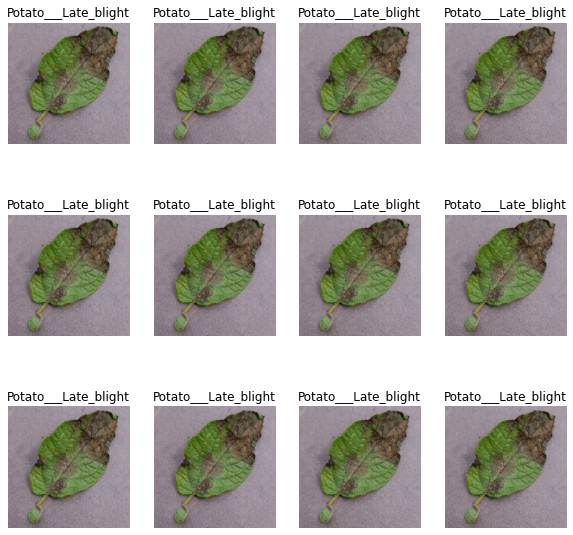

In [95]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [96]:
len(dataset)

68

In [97]:
print("80% ==> training")
print("20% ==> 10% validation, 10% test")

80% ==> training
20% ==> 10% validation, 10% test


In [98]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [99]:
train_ds = dataset.take(54)
len(train_ds)

54

In [100]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [101]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [102]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [103]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [104]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):

    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds
    

In [105]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [106]:
len(train_ds)

54

In [107]:
len(val_ds)

6

In [108]:
len(test_ds) 

8

In [109]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [110]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Updated from experimental to standard layers
    layers.Rescaling(1.0 / 255)  # Rescale pixel values to [0, 1]
])

In [111]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])   

In [112]:
import tensorflow as tf
from tensorflow.keras import layers, models

BATCH_SIZE = 32  # Your batch size
IMAGE_SIZE = 224  # Image dimensions
CHANNELS = 3  # RGB image
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Input shape for Conv2D
n_classes = 3  # Number of output classes

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Use GlobalAveragePooling2D instead of Flatten
    layers.GlobalAveragePooling2D(),
    
    # Dense layers for classification
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # Output layer
])

# Now you can view the model's architecture
model.summary()




Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 64)     

In [113]:
# Compile the model with sparse_categorical_crossentropy for integer labels
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])


In [114]:
# Import necessary TensorFlow modules
import tensorflow as tf
from tensorflow.keras import layers

# Build your model
model = tf.keras.Sequential([
    layers.Resizing(224, 224),  # Resize images to 224x224 if necessary
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust based on your number of classes
])


In [115]:
# Compile the model before training
model.compile(
    optimizer='adam',               # Specify the optimizer
    loss='sparse_categorical_crossentropy',  # Specify the loss function
    metrics=['accuracy']            # Optional metrics to track
)

In [116]:
# Now you can proceed with training
history = model.fit(
    train_ds,             # Replace with your training dataset
    epochs=3,             # Adjust the number of epochs as necessary
    validation_data=val_ds  # Replace with your validation dataset
)

Epoch 1/3
54/54 [==============================] - 150s 2s/step - loss: 1279.7419 - accuracy: 0.6279 - val_loss: 14.5408 - val_accuracy: 0.8605
Epoch 2/3
54/54 [==============================] - 126s 2s/step - loss: 5.5990 - accuracy: 0.9074 - val_loss: 0.5900 - val_accuracy: 0.9711
Epoch 3/3
54/54 [==============================] - 114s 2s/step - loss: 0.5831 - accuracy: 0.9774 - val_loss: 0.2131 - val_accuracy: 0.9878


In [117]:
#before deploying test the model
scores = model.evaluate(test_ds)

54/54 [==============================] - 25s 454ms/step - loss: 0.2131 - accuracy: 0.9878


In [118]:
scores

[0.21313726902008057, 0.9878472089767456]

In [119]:
history

In [120]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 54}

In [121]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [122]:
import matplotlib.pyplot as plt

# Assuming history is the output from model.fit()
acc = history.history['accuracy']           # Training accuracy
val_acc = history.history['val_accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss
EPOCHS = len(acc)                           # The number of epochs



Text(0.5, 1.0, 'Training and Validation Loss')

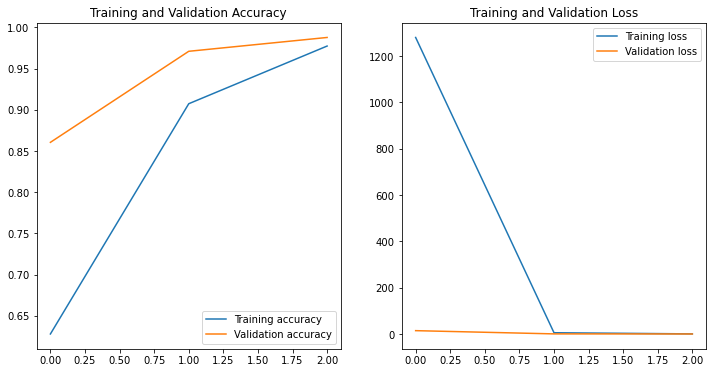

In [123]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [124]:
import numpy as np


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 906ms/step
predicted label: Potato___Early_blight


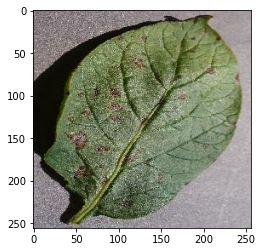

In [125]:
# make prediction
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [126]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 59ms/step


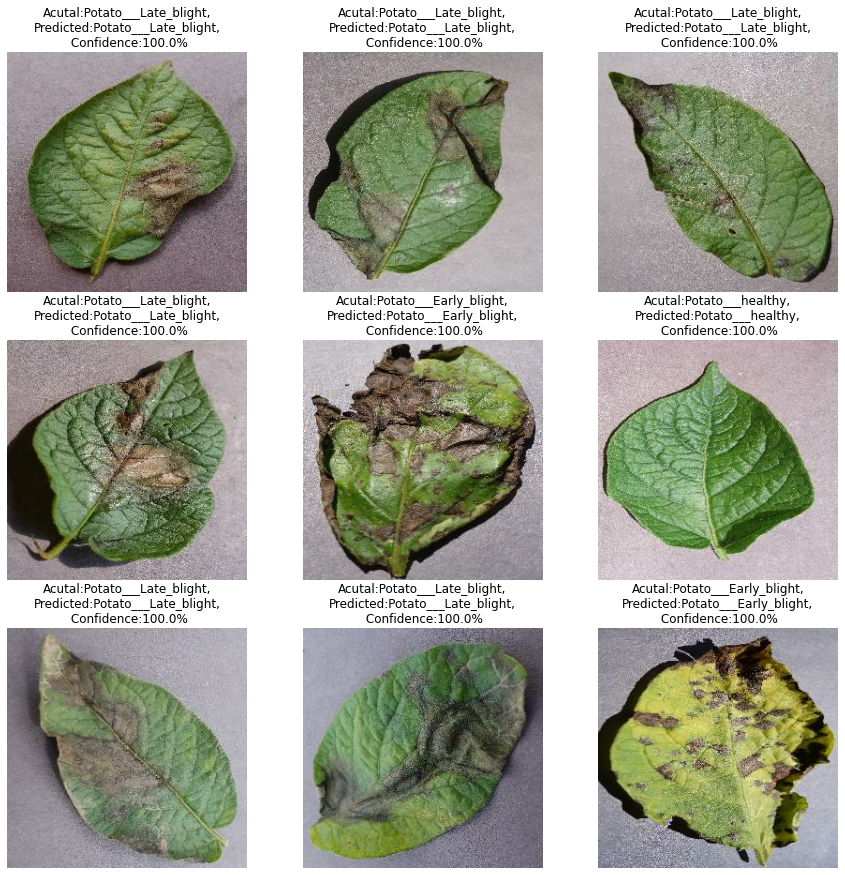

In [127]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Acutal:{actual_class},\nPredicted:{predicted_class},\n Confidence:{confidence}%")
        plt.axis("off")

In [128]:
import os
import tensorflow as tf

# Define the model directory
model_directory = "../models"

# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Find the next model version
existing_versions = [int(i) for i in os.listdir(model_directory) if i.isdigit()]
model_version = max(existing_versions, default=0) + 1

# Define the new model version path
new_model_path = os.path.join(model_directory, str(model_version))

# Create the new version directory
os.makedirs(new_model_path, exist_ok=True)

# Save the model
model.save(new_model_path)

print(f"Model saved as version: {model_version} at {new_model_path}")


INFO:tensorflow:Assets written to: ../models\3\assets


INFO:tensorflow:Assets written to: ../models\3\assets


Model saved as version: 3 at ../models\3
